In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/coronavirusdataset/trend.csv
/kaggle/input/coronavirusdataset/route.csv
/kaggle/input/coronavirusdataset/case.csv
/kaggle/input/coronavirusdataset/patient.csv
/kaggle/input/coronavirusdataset/time.csv


In [102]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
trend = pd.read_csv('/kaggle/input/coronavirusdataset/trend.csv')
trend

,date,cold,flu,pneumonia,coronavirus
0,2019-12-07,0.12408,0.24699,0.22144,0.01309
1,2019-12-08,0.11863,0.25390,0.19617,0.00836
2,2019-12-09,0.16308,0.47880,0.33180,0.01272
3,2019-12-10,0.13981,0.40789,0.30671,0.01881
4,2019-12-11,0.13972,0.39007,0.30299,0.01854
...,...,...,...,...,...
91,2020-03-07,0.71743,0.07690,0.22762,26.90492
92,2020-03-08,0.58752,0.06717,0.20553,26.49020
93,2020-03-09,0.45435,0.09263,0.23962,29.79228
94,2020-03-10,0.46934,0.09108,0.28635,28.49514


In [103]:
route = pd.read_csv('/kaggle/input/coronavirusdataset/route.csv')
route

,patient_id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680
...,...,...,...,...,...,...,...
207,55,2020-02-19,Gyeongsangbuk-do,Pohang-si,hospital_isolated,36.034762,129.355059
208,56,2020-02-17,Gyeongsangbuk-do,Pohang-si,hospital,37.576420,126.972759
209,56,2020-02-13,Seoul,Dongdaemun-gu,hospital,37.593919,127.051291
210,56,2020-02-13,Seoul,Jongno-gu,hospital,37.581837,126.969186


In [104]:
patient = pd.read_csv('/kaggle/input/coronavirusdataset/patient.csv')
patient

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated


In [105]:
time = pd.read_csv('/kaggle/input/coronavirusdataset/time.csv')
time

,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,...,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2020-01-25,16,27,25,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,2020-01-26,16,51,47,3,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
7,2020-01-27,16,61,56,4,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0
8,2020-01-28,16,116,97,4,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0
9,2020-01-29,16,187,155,4,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0


In [106]:
route['province'].value_counts()

Seoul               85
Gyeonggi-do         56
Daegu               29
Incheon             17
Gyeongsangbuk-do     9
Gangwon-do           5
Gwangju              5
Jeollabuk-do         4
Jeollanam-do         2
Name: province, dtype: int64

Based on the value counts of the route table, in regards to provinces, Seoul South Korea has the greatest number of incidences. Could it be that more densely populated areas have a higher risk of coronavirus? 

In [108]:
dates_numbering = np.empty(len(trend))
for i in range(len(trend)):
    dates_numbering[i] = i+1
date_numbers_series = pd.Series(dates_numbering)
trend['days_numbered'] = date_numbers_series

Text(0.5, 1.0, 'Types of illness versus Time')

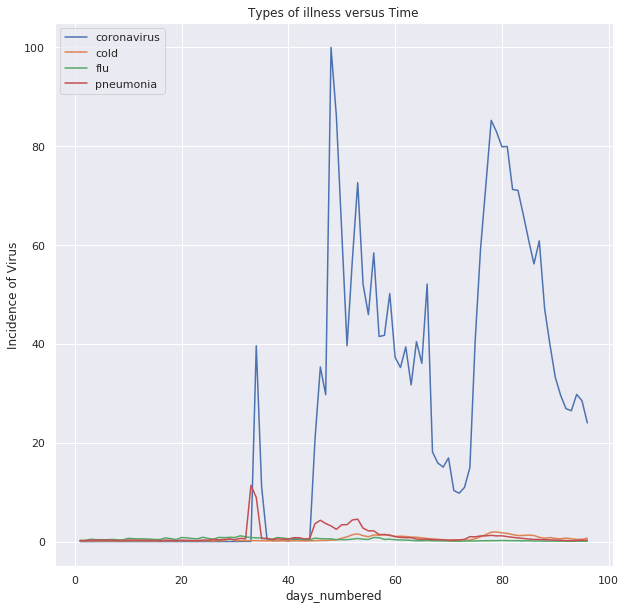

In [117]:
sns.lineplot(x= 'days_numbered', y = 'coronavirus', data=trend, label = 'coronavirus')
sns.lineplot(x= 'days_numbered', y = 'cold', data=trend, label = 'cold')
sns.lineplot(x= 'days_numbered', y = 'flu', data=trend, label = 'flu')
sns.lineplot(x= 'days_numbered', y = 'pneumonia', data=trend, label = 'pneumonia')
plt.legend(loc="upper left")
min(trend['date']), max(trend['date'])
plt.ylabel("Incidence of Virus")
plt.title("Types of illness versus Time")

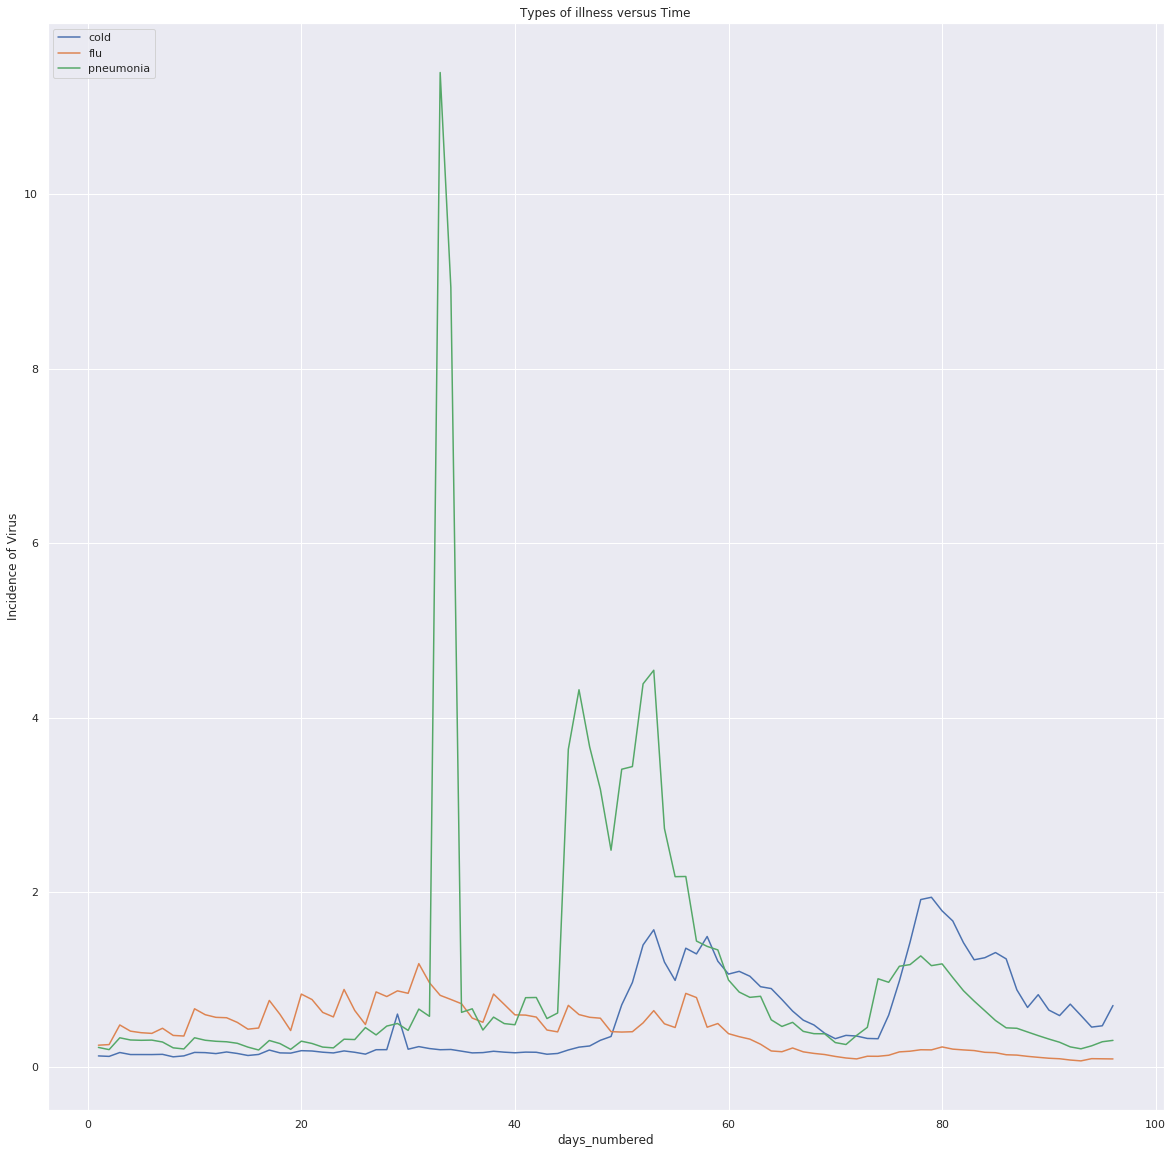

In [121]:
sns.lineplot(x= 'days_numbered', y = 'cold', data=trend, label = 'cold')
sns.lineplot(x= 'days_numbered', y = 'flu', data=trend, label = 'flu')
sns.lineplot(x= 'days_numbered', y = 'pneumonia', data=trend, label = 'pneumonia')
plt.legend(loc="upper left")
min(trend['date']), max(trend['date'])
plt.ylabel("Incidence of Virus")
plt.title("Types of illness versus Time")

During the timespan from December 7th, to March 11th, the incidence of other diseases that have vaccines and cures(cold, flu, pneumonia) have stayed relatively low and constant in terms of incidence(less than 1) in South Korea. However, between early to mid february the coronavirus, which doesn't currently have a vaccine available, has skyrocketed in incidence starting and has continued fluctuating about values of high incidence until the present. Particularly, the coronavirus has fluctuated in terms of incidence from about 40 in late january to early february to 98, and back down to 20, undulating back to 80 in late february back down again into early March.

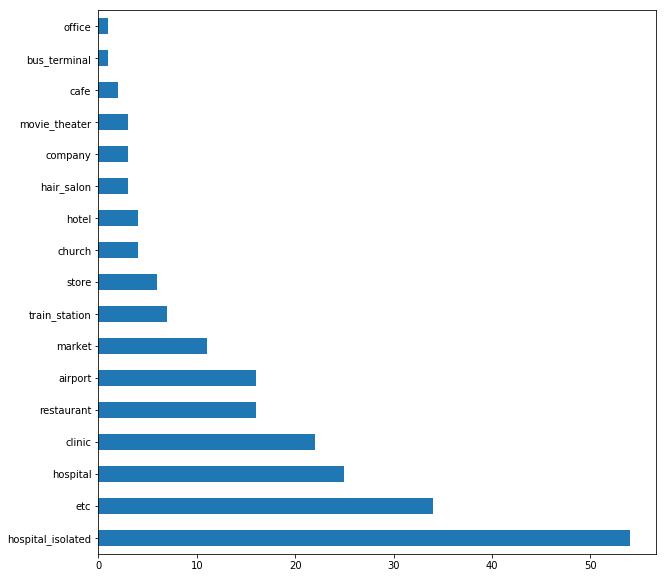

In [92]:
route['visit'].value_counts().plot(kind='barh', figsize=(10,10))

In [93]:
patient['sex'].value_counts()

female    393
male      286
Name: sex, dtype: int64

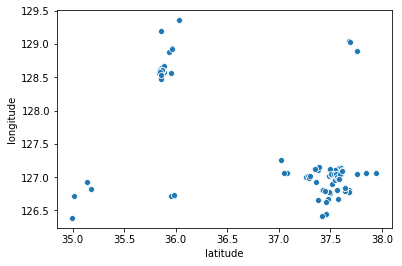

In [94]:
sns.scatterplot(x= 'latitude', y = 'longitude', data=route)

In [95]:
find_age = lambda birth_year: 2020-birth_year
patient['age'] = patient['birth_year'].apply(find_age)
average_birth_year_by_sex = patient[['sex', 'age']].groupby('sex', as_index = False).agg(np.mean)
average_birth_year_by_sex 

,sex,age
0,female,45.588542
1,male,45.992883


1. Seems that the average age for both males and females in the representative sample is about 50 years old. Could it be that those who contracted the corona virus were older on average?

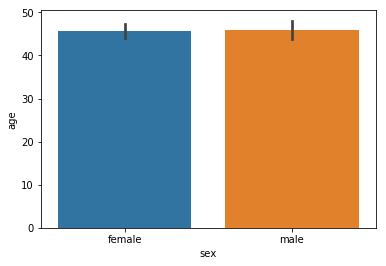

In [96]:
sns.barplot(x = 'sex', y = 'age', data = patient)

91.0
2.0
89.0


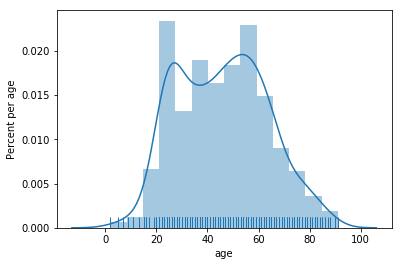

In [97]:
sns.distplot(patient['age'], kde = True, rug = True)
plt.ylabel('Percent per age')
print(max(patient['age']))
print(min(patient['age']))
two = min(patient['age'])
ninety_one = max(patient['age'])
the_range = max(patient['age']) - min(patient['age'])
print(the_range)

This distribution looks bimodal and roughly symmetric. It is slightly skewed to higher age numbers. Another question to ask, it is how long on average did it take people to get released from the hospital and presumably cured for the coronavirus?

In [98]:
patients_released = patient[patient['state'] == 'released']
patients_confimed_date = patient['confirmed_date'].str.split("-", expand = True)
patients_confimed_date = patients_confimed_date.rename(columns = {0: 'Year', 1: 'Month', 2: 'Day'}).fillna(0)
patients_released_date = patient['released_date'].str.split("-", expand = True)
patients_released_date = patients_released_date.rename(columns = {0: 'Year', 1: 'Month', 2: 'Day'}).fillna(0)
patients_confimed_date['Days'] = patients_confimed_date['Month'].astype(int)*30+patients_confimed_date['Day'].astype(int)
patients_released_date['Days'] = patients_released_date['Month'].astype(int)*30+patients_released_date['Day'].astype(int)
patient['Duration'] = patients_released_date['Days'] - patients_confimed_date['Days'] 
patient = patient[patient['Duration'] > 0]
patient['Duration']

0       16
1       11
2       16
3       12
4       32
5       19
6       15
7       11
8       23
9       18
10       9
11      17
12      22
13      16
14      22
15      15
16       7
17      14
18      16
19      19
20      24
21       9
22      23
23      21
24      26
27       7
31      16
36       8
38      15
49      13
50       7
62       8
64       8
82      11
221     15
240     12
346     12
588      4
592     11
926      9
937      8
1012     1
1117     8
1128     8
1243     9
1245     7
1254     8
1255     6
1369     6
1377     6
1566     6
2465     4
2467     5
2469     5
2732     6
2857     5
Name: Duration, dtype: int64

12.267857142857142


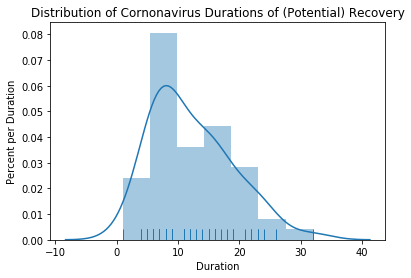

In [99]:
sns.distplot(patient['Duration'], kde = True, rug = True)
plt.ylabel('Percent per Duration')
plt.title('Distribution of Cornonavirus Durations of (Potential) Recovery')
average_duration = np.mean(patient['Duration'])
print(average_duration) 

Most patients got cured in about a span of 12 days. We can cautiously make the claim that most of these patients contracted the virus and were cured within on average a 12 day timespan. However, others that may not have had the coronavirus were forcefully detained for public health reasons. This histogram appears unimodal, and skewed to higher durations(indicative of those potentially in serious condition and requring further recovery). Let us now explore the association between duration and age. 

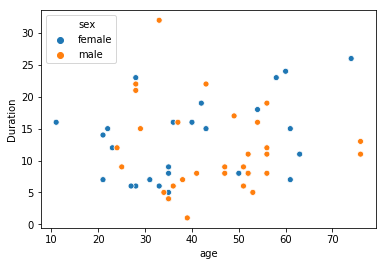

In [100]:
sns.scatterplot(x = patient['age'], y = patient['Duration'], hue = patient['sex'])

There appears to be no association between age and duration of stay in the hospital. In short, based on this analysis, Coronavirus targets all ages and both genders equally, and the duration most likely is associated with the severity of the conditions, represented by the skew to right of the hospital durations.  